# PIT - Práctica 1: Análisis de Series Temporales - Modelos Clásicos

**Alicia Lozano Díez**

10 de febrero de 2025


## Objetivo

El objetivo de esta práctica es proporcionar una introducción al procesamiento y análisis de señales temporales: descomposición de una serie temporal para el estudio de sus propiedades, ajuste de modelos lineales (ARIMA) y predicción.

### Materiales - Moodle

- Guión (.ipynb) de la práctica
- Datos (.csv): bases de datos _AirPassengers.csv_ y _stocks_1yr.csv_.

## Autores (pareja 2): 
* Rafael Domínguez Sáez
* Iñigo Martínez Ciriza


# 1. Introducción al procesamiento de señales temporales: Air Passengers

## 1.1. Cargar los datos en Google Colab y manejo de los datos en Python

Primero vamos a descargar el fichero con los datos de la base de datos *AirPassengers.csv* de Moodle, que contiene los datos del número de pasajeros de una aerolínea para un período de tiempo.

Las siguientes líneas de código nos permitirán subir el archivo a Google Colab desde el disco local:

In [1]:
# from google.colab import files
# uploaded = files.upload()

A continuación, vamos a leer el fichero *AirPassengers.csv* en Python, con la ayuda de la librería *pandas*.

Lo cargaremos haciendo uso también del módulo de Python *datetime* para operar con este tipo de datos de forma cómoda.

La función definida *parser* nos permitirá cambiar el formato de fecha/tiempo al formato que esperamos encontrar en nuestra base de datos.

In [2]:
from pandas import read_csv

data = read_csv('AirPassengers.csv', header=0, parse_dates=[0], index_col=0,
                date_format='%Y-%m')
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


Podemos visualizar cómo está indexada la estructura de datos, así como el número de datos que tiene nuestra serie temporal.

In [3]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Si queremos acceder a un dato en concreto, por ejemplo, el número de pasajeros del mes de marzo de 1949, podemos hacerlo de la siguiente forma:

In [4]:
data['#Passengers'].get('1949-03-01')

132

## 1.2. Representación de los datos


El primer paso para analizar una serie temporal es obtener una representación de los datos, para poder hacernos una idea de las características de la serie de forma visual.

Para ello, podemos utilizar la librería *matplotlib* como sigue:

Text(0.5, 1.0, 'Serie temporal: Air Passengers')

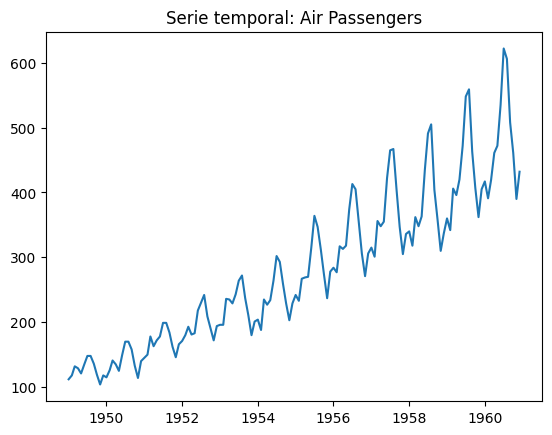

In [5]:
from matplotlib import pyplot as plt
plt.plot(data)
plt.title('Serie temporal: Air Passengers')

## 1.3. Estudio de la estacionariedad de la serie


Algunos de los modelos de análisis de series temporales asumen estacionariedad en las series. Por ello, vamos a ver dos métodos para comprobar si una serie es estacionaria.

Uno de ellos es un análisis más visual: calculamos la media y desviación estándar "móviles" (con una ventana deslizante).

In [6]:
import pandas as pd

def test_stationarity_1(timeseries,window_size):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation. Window size: '+str(window_size))
    plt.show(block=False)

El segundo método consiste en el test estadístico Dickey-Fuller:

In [7]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
def test_stationarity_2(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [8]:
def test_stationarity(timeseries,window_size):
    test_stationarity_1(timeseries,window_size)
    test_stationarity_2(timeseries)

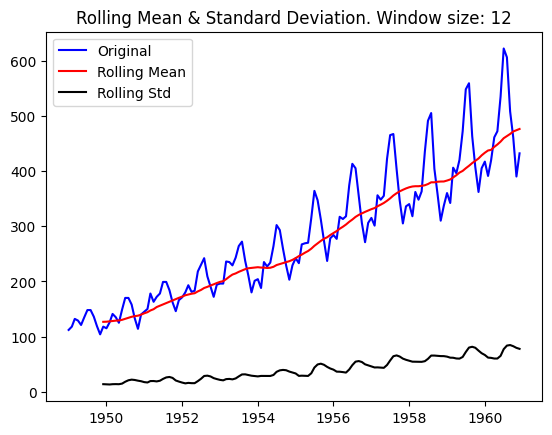

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
# Test Dickey-Fuller

test_stationarity(data,12)

Se puede variar el tamaño de la ventana para observar cómo varía la media móvil.

Vemos que al aumentar el tamaño de la ventan, la media móvil deja de aproximarse a la serie original y disminuye la varianza. Ambas variables se suavizan.

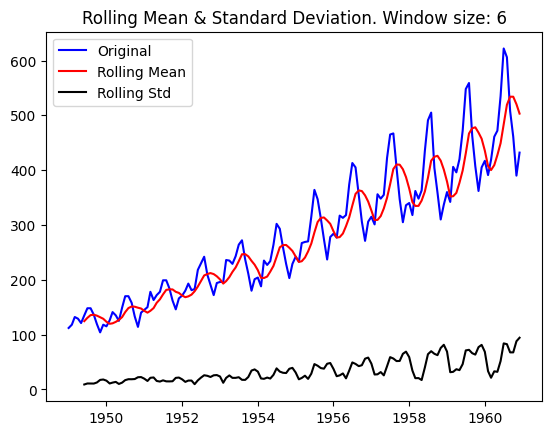

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


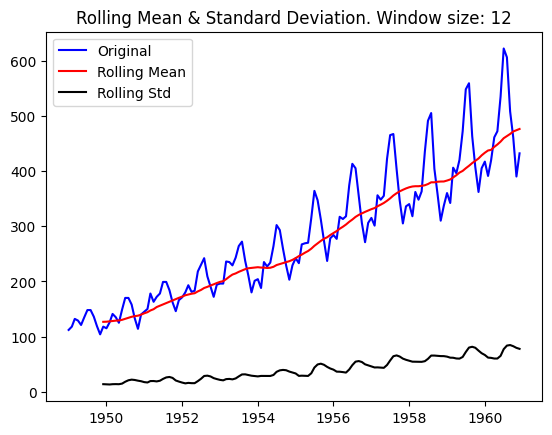

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


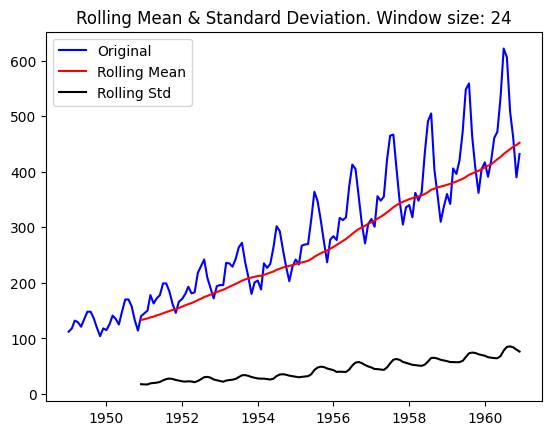

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
# Cambios el tamaño de la ventana

n_months = [6, 12, 24]
for n in n_months:
    test_stationarity(data, n)

**PREGUNTA 1**

¿Qué conclusiones puede extraer del análisis de estacionariedad de la serie original?

Vamos a estudiar las conclusioesn que se pueden realizar de la estacionariedad a partir del análisis visual y del análisis con el test estadístico de Dickey-Fuller.

* Análisis visual: se puede observar claramente que la serie es no estacionaraia. Esto se debe a que se puede observar claramente que tanto la media como la desviación típica tienen una tendencia creciente. Una serie es estacionaria si la media y la desviación típica se mantienen coonstantes en el tiempo.

* Análisis estadístico: el test de Dickey-Fuller realiza un test estadístico para comprobar que la hipótesis nula $H_0$: "está presente una raíz unitaria" en el modelo autorregresivo sea falsa o veradera. Sabemos que si una raíz unitaria está presenta en el modelo el proceso es no estacionario (aunque no siempre tenga una tendencia clara). Por tanto, si rechazamos la hipótesis nula (si el p-valor es menor que un valor de confianza $\alpha$ razonable), se acepta que el modelo no tiene una raíz unitaria y por tanto el modelo sería estacionario. Como se puede comprobar, tenemos $p-valor = 0.99$ que es mayor que cualquier nivel de confianza razonable (para una confianza del 95% se tiene que $\alpha = 0.05$ y para el 99% de confianza se tiene que $\alpha = 0.01$). Por tanto, como $p-valor > \alpha$ para cualquier nivel de confianza razonable, no podemos rechazar la hipótesis nula, lo que indica que no hay suficiete evidencia para decir que el modelo est estacionario. Por tanto, concluimos que el modelo es no estacionario.

Ambos análisis llegan a la misma conclusión, por lo que la conclusión final es que la serie original es no estacionaria.

## 1.4. Transformar una serie temporal en estacionaria

Como hemos visto en la teoría, para analizar la serie y poder ajustarle un modelo tipo AR, MA o ARMA, esperamos que la serie a modelar sea estacionaria.

Para conseguir una serie lo más estacionaria posible, podemos aplicar distintas transformaciones de la serie original. Vamos a ver algunos ejemplos:

a) *Transformaciones simples para reducir el efecto de la tendencia*:

En el caso de los datos del ejemplo, la tendencia es positiva, por lo que podemos aplicar alguna transformación que penalice los valores más altos y menos los más bajos. Es el caso del logaritmo, la raíz cuadrada, etc.

A continuación se representa la serie aplicándole una transformación logarítmica.



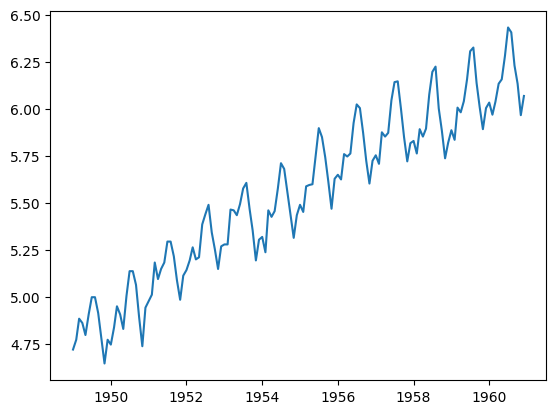

In [11]:
import numpy as np

# Aplicamos logaritmo

data_log = np.log(data)
plt.plot(data_log)

En casos más complejos en los que la tendencia no se ve clara (sobre todo en presencia de ruido), se pueden aplicar otros métodos. Uno de ellos es el suavizado como las medias móviles (*moving average*).

Por ejemplo, podemos aplicar un suavizado con una media con ventana deslizante que tenga en cuenta un año (12 meses).
Ten en cuenta, que esto implicará que para calcular la media de las primeras muestras, no tengo suficientes datos para la ventana. Esto lo podemos ver en la salida de la media móvil (tendremos que eliminar los *NaN* que aparecen).


**PREGUNTA 2**

Elimina de la serie original (o la transformada con el logaritmo) la influencia de su media móvil y representa el resultado. ¿Qué observas?

Se observa que al eliminar la media móvil de la serie (tranformada logarítmica), se consigue una serie cuya tendencia queda eliminada, siendo la media más o menos constante. Esto era esperado ya que al restar la media móvil a los valores de la serie, se consigue una con media cero.

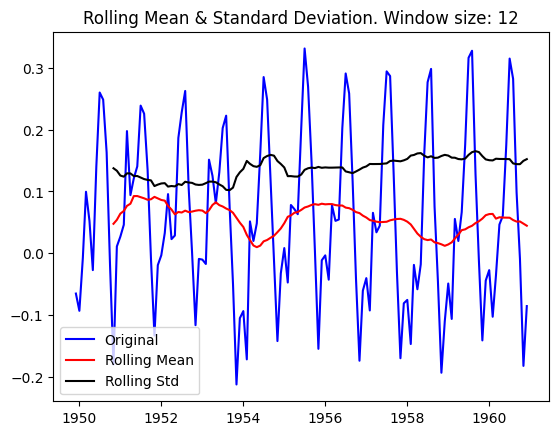

In [12]:
# Restamos media móvil
moving_avg = data_log.rolling(window=12).mean()
data_log_diff = data_log - moving_avg 
test_stationarity_1(data_log_diff, window_size=12)

b) *Diferenciar (derivar)*:

Las técnicas anteriores son sencillas y pueden eliminar parte de la influencia de la tendencia de la serie, pero no suelen ser suficientes cuando se tiene por ejemplo estacionalidad.

Diferenciar (o derivar) es uno de los métodos más comunes para eliminar la influencia de la tendencia y la estacionalidad en la serie original, mejorando las propiedades de estacionariedad de la serie.

Podemos tomar la derivada de orden uno de la siguiente manera (partimos de la serie en el dominio logarítmico):

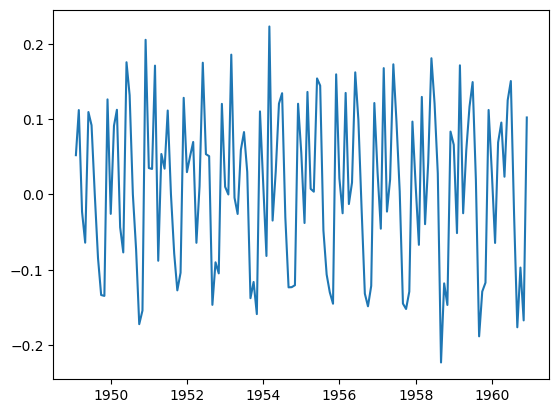

In [13]:
# Derivamos la serie

data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)

**PREGUNTA 3**

Si aplicas el test estadístico de Dickey-Fuller, ¿es esta serie estacionaria? ¿Y si aplicas una segunda derivada?

Al aplicar una primera derivada, un análisis visual nos permite determinar que la serie parece estacionaria ya que tanto la media como la desviación típica parecen constantes. Sin embargo, debemos realizar un análisis matemático, aplicando el test Dickey-Fuller para comprobar que el p-valor es realmente suficientemente bajo para rechazar la hipótesis nula $H_0$.

Como para una sola derivada tenemos $p-valor = 0.071 > 0.050 = \alpha$ para un nivel de confianza razonable (95%), no podemos rechazar la hipótesis nula, lo que indica que no hay suficiete evidencia para decir que el modelo est estacionario. Por tanto, concluimos que el modelo es no estacionario. Sin embargo, para un nivel de confianza del 90%, llegaríamos a la conclusión de que la serie es estacionaria, ya que se tiene que $\alpha=0.10$ para este nivel.

En conclusión, al aplicar una sola derivada, si queremos estar seguros con una confianza del 95%, la serie no es estacionaria.

Al aplicar una segunda derivada, el análisis visual nos vuelve a determinar una media constante (mucho más constante que en el caso de una sola derivada) lo que refuerza la idea de que la serie es estacionaria. Sin embargo, hemos visto que no nos podemos fiar de este criterio y que debemos aplicar el test de Dickley-Fuller para poderlo determinar matemáticamente.

Para una segunda derivada, tenemos que $p-valor = 7.42e-13$, que es menor que cualquier nivel de significación razonable. Es decir, que ahora sí que podemos rechazar la hipótesis nula con una confianza superior al 99.99% (total seguridad), determinando así que la serie sí es estacionaria tras aplicar dos derivadas.

En conclusión, al aplicar una segunda derivada, la serie es estacionaria con total seguridad.


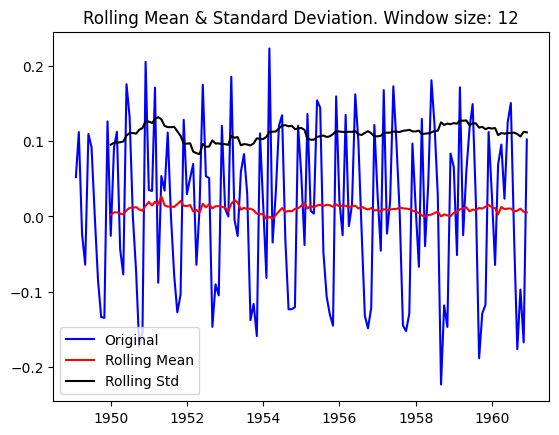

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [14]:
# Test Dickey-Fuller a la serie derivada una vez

data_log_diff.dropna(inplace=True) 
test_stationarity(data_log_diff,12)

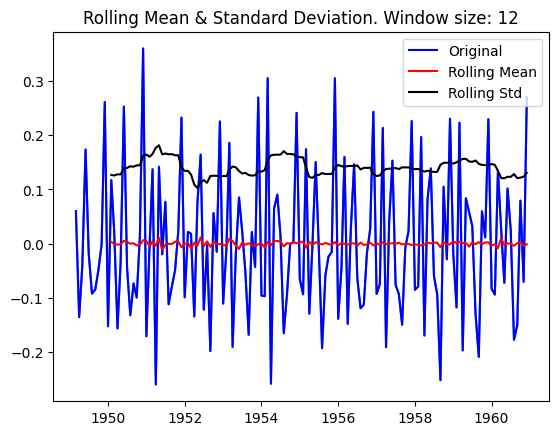

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [15]:
# Derivamos la serie derivada

data_log_diff_2 = data_log_diff - data_log_diff.shift()
plt.plot(data_log_diff_2)

# Test Dickey-Fuller a la serie derivada dos veces

data_log_diff_2.dropna(inplace=True) 
test_stationarity(data_log_diff_2,12)

c) *Descomposición de la serie*:

La mayoría de series pueden descomponerse en tendencia, estacionalidad y residuo, como hemos visto en clase.

Utilizando la función *seasonal_decompose* del módulo de Python *statsmodels* podemos obtener estas tres componentes y por tanto, modelarlas por separado:

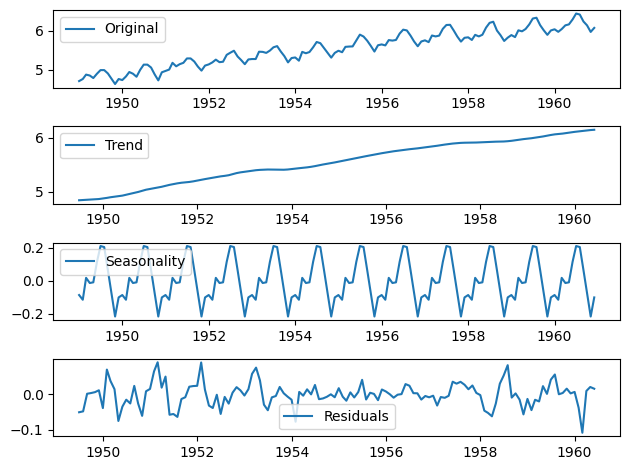

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**PREGUNTA 4**

¿Es la señal residual estacionaria? Realiza el test y comenta los resultados.

Un análisis visual de la representación de la señal residual nos permite determinar que la serie parece estacionaria ya que tanto la media como la desviación típica parecen constantes. Sin embargo, debemos realizar un análisis matemático, aplicando el test Dickey-Fuller para comprobar que el p-valor es realmente suficientemente bajo para rechazar la hipótesis nula $H_0$.

La aplicación del test nos devuelve $p-valor = 2.89e-8$, que es menor que cualquier nivel de significación razonable. Es decir, que podemos rechazar la hipótesis nula con una confianza superior al 99.99% (total seguridad), determinando así que la serie de los residuos sí es estacionaria.

En conclusión, la señal residual es estacionaria con total seguridad.

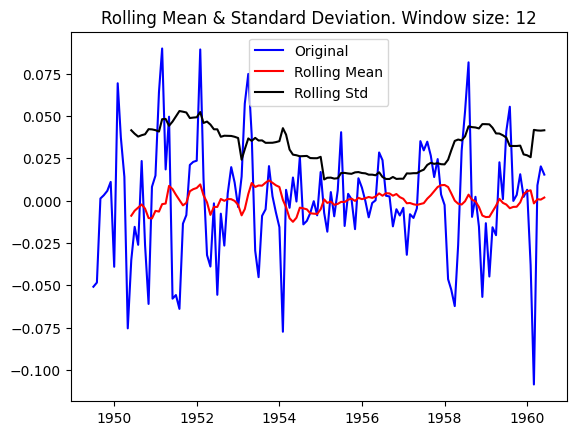

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [17]:
# Test Dickey-Fuller a los residuos

test_stationarity(residual.dropna(),12)

## 1.5. Modelado ARIMA y predicción

Uno de los modelos clásicos para series temporales vistos en clase es el modelo ARIMA, que permite derivar *d* veces, y aplicar *p* coeficientes autorregresivos (AR) y *q* términos de error (shocks, provenientes de la parte MA) en la combinación lineal.  

Para determinar el valor de los parámetros *p* y *q*, podemos hacer uso de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).

Si calculamos dichas funciones para la serie derivada previamente, obtenemos lo siguiente:

Text(0.5, 1.0, 'Partial Autocorrelation Function')

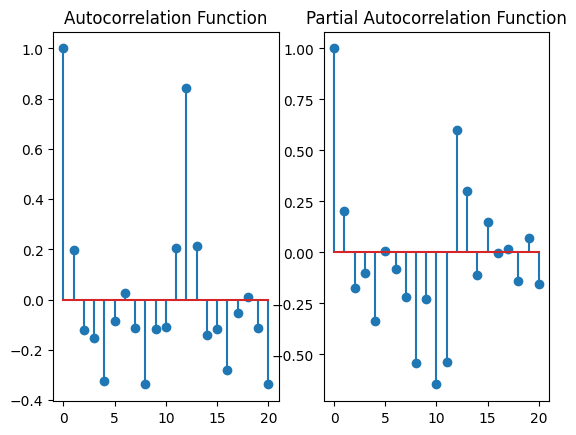

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20, fft=False)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.title('Partial Autocorrelation Function')

Podemos añadir además un intervalo de confianza a ambos lados del valor cero, de tal manera que el primer valor de retardo que cruce ese intervalo por arriba en la función de PACF será el valor de *p*, y de ACF, será *q*.

Para los niveles de confianza estándar, el valor del límite del intervalo de confianza al 95% es 1.96. Suponiendo desviación estándar unidad, el límite estaría en (-1.96/sqrt(N), 1.96/sqrt(N)), donde N es el número de puntos.

Si incluimos estos límites en la figura anterior, podemos obtener una buena aproximación de los valores de *p* y *q* para el modelo ARIMA:

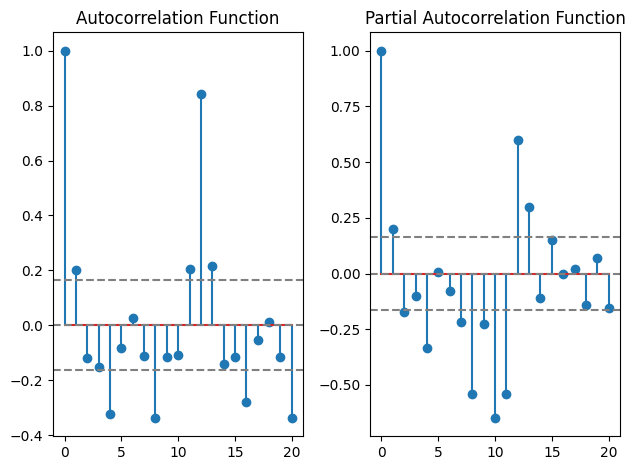

In [19]:
#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Estas gráficas nos ayudan a obtener una estimación de los valores *p* y *q*, según aquellos que indican valores significativos de retardo de las funciones anteriores.



Una vez elegidos los valores de *p* y *q*, podemos utilizar también la derivación interna de la clase ARIMA (*d*) o aplicarlo sobre la serie previamente derivada con valor de *d=0*.

A continuación, importamos el modelo ARIMA de la siguiente manera.

Este modelo tiene como argumentos los datos, y el orden:

model = ARIMA(datos, order = (p,d,q))

In [20]:
from statsmodels.tsa.arima.model import ARIMA           

**PREGUNTA 5**

¿Qué valores de p, d y q utilizarías para ajustar un modelo tipo AR? ¿Y uno MA? ¿Y uno ARMA?

De la teoría de clase, sabemos que para un modelo ARIMA que tiene 3 parámetros:
* $p$ indica el orden del modelo AR que se utiliza.
* $q$ indica el orden del modelo MA que se utiliza.
* $d$ indica el orden de derivadas que se realizan.

Por tanto, para un modelo AR se utiliza $p=1$, $q=0$ y $d=0$ donde $p=1$ viene dado porque es el primer término que sobresale del intervalo en la gráfica de PACF.

Para un modelo MA se utiliza $p=0$, $q=1$ y $d=0$ donde $q=1$ viene dado porque es el primer término que sobresale del intervalo en la gráfica de ACF.

Para un modelo ARMA, que combina linealmente el modelo AR y el modelo MA, se utiliza $p=1$, $q=1$ y $d=0$ donde $p=q=1$ vienen de las justificaciones anteriores.

Si quisieramos realizar un modelo ARIMA, tendríamos que establecer $d=1$ ya que requiere de una derivada al menos. Otra alternativa sería aplicar un modelo ARMA a los datos de la serie derivada manualmente que hemos utilizado en la sección 1.4 (`data_log_diff`).

Como se puede ver en las gráficas, a medida que realizamos opearciones más elaboradas, el modelo tiene un menor valor de RSS, lo que significa que realiza un mejor ajuste de la serie original.

Con el siguiente código, puedes ajustar distintos modelos y compararlos dependiendo de su valor de ajuste a los datos, para lo que utilizamos el RSS (Residual sum of squares).

c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


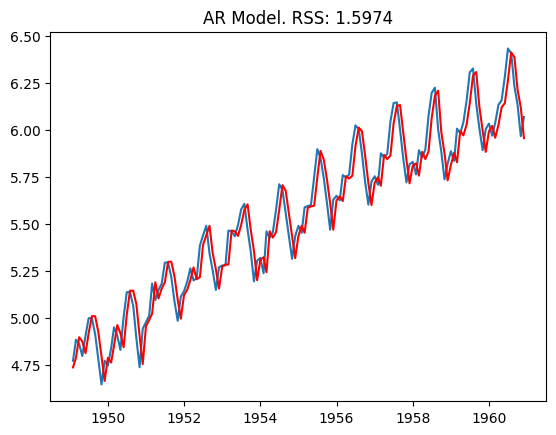

c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


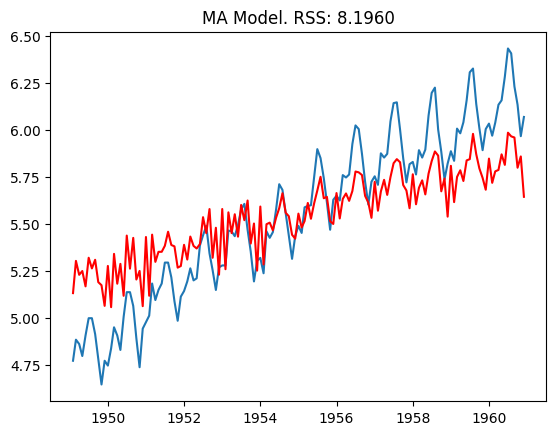

c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


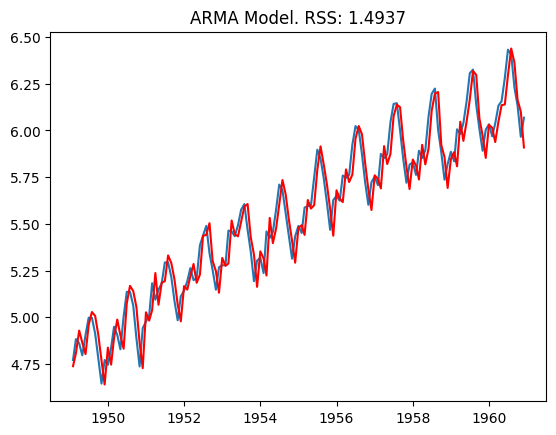

c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


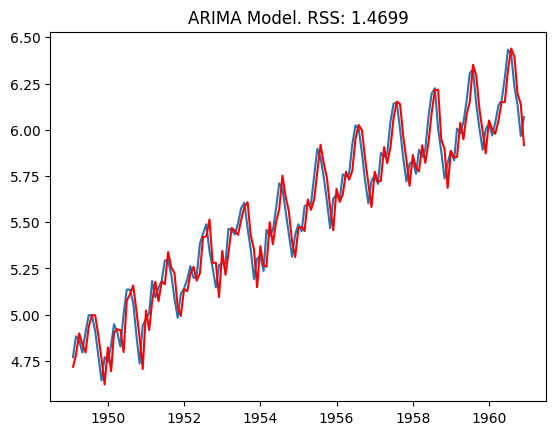

In [21]:
# AR
p = 1
d = 0
q = 0

model = ARIMA(data_log, order=(p, d, q), freq = 'MS')
results_AR = model.fit()
plt.plot(data_log[1:])
plt.plot(results_AR.fittedvalues[1:], color='red')
plt.title('AR Model. RSS: %.4f'% sum((results_AR.fittedvalues[1:]-data_log['#Passengers'][1:])**2))
plt.show()

# MA
p = 0
d = 0
q = 1

model = ARIMA(data_log, order=(p, d, q), freq = 'MS')
results_MA = model.fit()
plt.plot(data_log[1:])
plt.plot(results_MA.fittedvalues[1:], color='red')
plt.title('MA Model. RSS: %.4f'% sum((results_MA.fittedvalues[1:]-data_log['#Passengers'][1:])**2))
plt.show()

# ARMA
p = 1
d = 0
q = 1

model = ARIMA(data_log, order=(p, d, q), freq = 'MS')
results_ARMA = model.fit()
plt.plot(data_log[1:])
plt.plot(results_ARMA.fittedvalues[1:], color='red')
plt.title('ARMA Model. RSS: %.4f'% sum((results_ARMA.fittedvalues[1:]-data_log['#Passengers'][1:])**2))
plt.show()

# ARIMA
p = 1
d = 1
q = 1

model = ARIMA(data_log, order=(p, d, q), freq = 'MS')
results_ARIMA = model.fit()
plt.plot(data_log[1:])
plt.plot(results_ARIMA.fittedvalues[1:], color='red')
plt.title('ARIMA Model. RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:]-data_log['#Passengers'][1:])**2))
plt.show()

Por último, para predecir valores en el espacio original, tenemos que deshacer las transformaciones realizadas hasta el momento.

Primero, tomamos los valores ajustados por el modelo (predicciones) y los guardamos como serie temporal.

Estos valores empiezan en el segundo mes, puesto que hemos tomado diferencias (derivada) de orden 1.

In [22]:
# Predicciones

predictions_ARIMA_log = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_log.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.780426
1949-04-01    4.899112
1949-05-01    4.841283
dtype: float64


Las nuevas versiones de la librería, ya devuelven la operación de diferencias (en escala logarítmica) "eliminada", por lo que no necesitamos deshacerla con una suma acumulativa. Y por tanto, sólo necesitamos revertir la operación logarítmica. Para ello, aplicamos la función exponencial (inversa del logaritmo).


In [23]:
predictions_ARIMA = np.exp(predictions_ARIMA_log[1:])


Podemos calcular el error cuadrático medio en el espacio original.

Text(0.5, 1.0, 'RMSE: 31.0445')

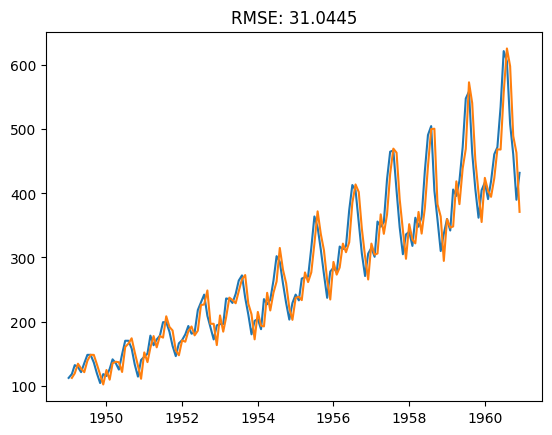

In [24]:
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.sum((predictions_ARIMA-data['#Passengers'])**2)/len(data)))

Vemos que las predicciones son bastante razonables y se ajustan bastante bien a la serie original (de forma visual), con un error cuadrático medio bastante pequeño para la cantidad de datos que hay.

# 2. Aplicación a otros datos: Acciones en bolsa S&P 500 stock data


Vamos a cargar ahora los datos sobre las acciones en bolsa del fichero *stocks_1yr.csv*:

In [25]:
# from google.colab import files
# uploaded = files.upload()

Esta base de datos contiene los datos para las acciones (*stocks*) de un año, y por columnas, contiene los siguientes campos:


* Date - en formato: yy-mm-dd

* Open - precio de la acción en la apertura de la bolsa

* High - precio más alto alcanzado en el día

* Low Close - precio más bajo en el día

* Volume - Número de acciones vendidas/compradas

* Name - Nombre de la compañía

In [26]:
from pandas import read_csv
from matplotlib import pyplot


data = read_csv('stocks_1yr.csv', header=0, parse_dates=[0], index_col=0, date_format='%Y-%m-%d')
print(data.head())

             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


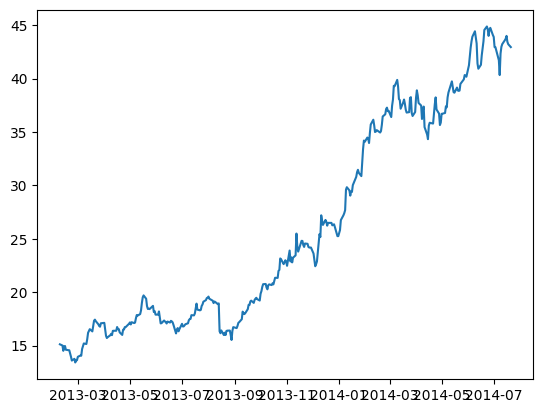

In [27]:
from matplotlib import pyplot as plt
plt.plot(data.high)

Utilizando las herramientas del apartado 1, realiza el análisis de esta serie (puedes utilizar un intervalo de ella o la serie completa).

En concreto:
1.   Analiza la estacionariedad de esta serie.
2.   ¿Qué transformaciones puedes realizar para hacerla más estacionaria? Prueba algunas y justifica si consigues una serie más estacionaria.
3.   Ajusta un modelo ARIMA, y calcula el error de predicción.

**1. Analiza la estacionariedad de esta serie.**

Vamos a estudiar las conclusioesn que se pueden realizar de la estacionariedad a partir del análisis visual y del análisis con el test estadístico de Dickey-Fuller.

* Análisis visual: se puede observar claramente que la serie es no estacionaraia. Esto se debe a que se puede observar claramente que la media  tiene una tendencia creciente aunque la desviación típica parezca ser constante.

* Análisis estadístico: aplicamos el test de Dickey-Fuller a la nueva serie Como se puede comprobar, tenemos $p-valor = 0.97$ que es mayor que cualquier nivel de confianza razonable (95% con $\alpha = 0.05$ o 99% de confianza con $\alpha = 0.01$). Por tanto, como $p-valor > \alpha$ para cualquier nivel de confianza razonable, no podemos rechazar la hipótesis nula, lo que indica que no hay suficiete evidencia para decir que el modelo est estacionario. Por tanto, concluimos que el modelo es no estacionario.

Ambos análisis llegan a la misma conclusión, por lo que la conclusión final es que la serie original es no estacionaria.

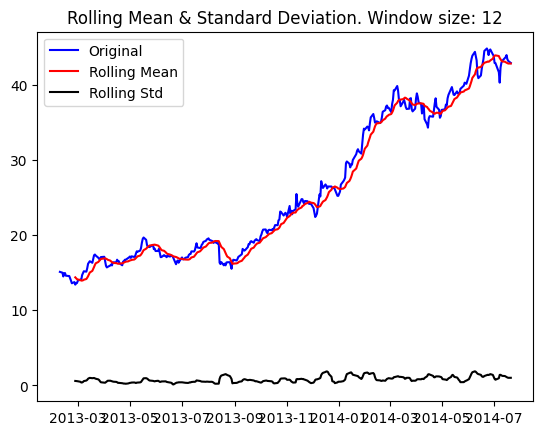

Results of Dickey-Fuller Test:
Test Statistic                   0.239126
p-value                          0.974373
#Lags Used                       3.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


In [28]:
# Test Dickey-Fuller 

data = data.high
test_stationarity(data,12)

**2. ¿Qué transformaciones puedes realizar para hacerla más estacionaria? Prueba algunas y justifica si consigues una serie más estacionaria.**

Hemos visto varias estrategias que se pueden aplicar a las serire para hacerla más estacionaria:

a) Transformaciones simples para reducir el efecto de la tendencia como el logaritmo o la raíz cuadrada. También se puede restar la media móvil a la serie.

b) Derivar, que consiste en realizar la diferencia entre la serie original y la serie desplazada

c) Realizar la descompmosición es tendencia, estacionalidad y residuos.

Aplicando el logaritmo a los datos originales se puede comprobar visualmente de forma clara que la tendencia creciente de la serie se mantiene. Por tanto, vamos a probar otra estrategia como es la de restar la media móvil

Así, restamos la media móvil a la serie original y observamos que parece más estacionaria. Para asegurarlo, aplicamos el test de Dickey-Fuller. Observamos que se obtiene $p-valor = 7.58e-7$, que es menor que cualquier nivel de significación razonable. Es decir, que podemos rechazar la hipótesis nula con una confianza superior al 99.99% (total seguridad), determinando así que la serie sin la media móvil sí es estacionaria. En conclusión, esta serie es estacionaria con total seguridad.

Otra estrategia es aplicar la derivada a la serie original. Así, restamos a la serie original la serie desplazada para obtener una deriada manual. A esta serie derivada aplicamos el test de Dickey-Fuller. Observamos que se obtiene $p-valor = 4.15e-30$, que es menor que cualquier nivel de significación razonable (y menor que el valor de la resta de la media móvil). Es decir, que podemos rechazar la hipótesis nula con una confianza superior al 99.99% (total seguridad), determinando así que la serie derivada sí es estacionaria (y más estacionaria aún que la serie sin la media móvil). En conclusión, esta serie es estacionaria con total seguridad.

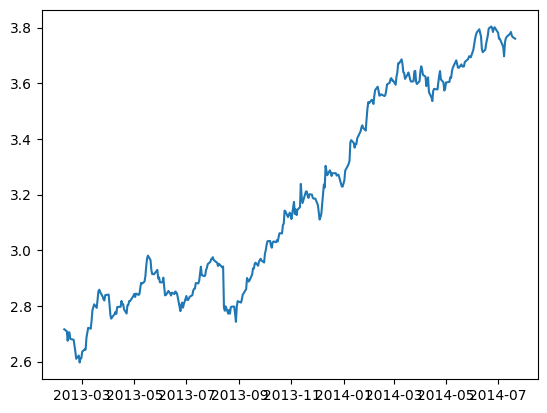

In [29]:
# Aplicamos logaritmos

data_log = np.log(data)
plt.plot(data_log)

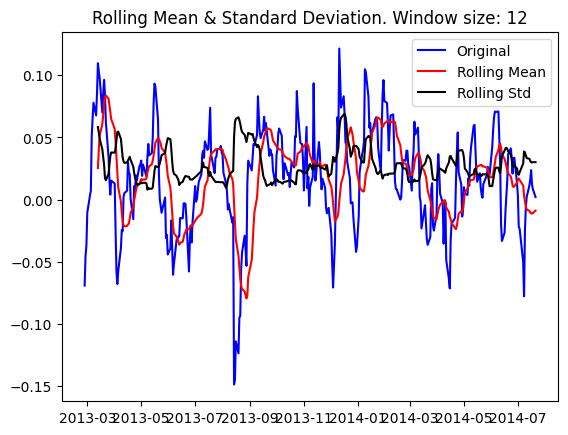

Results of Dickey-Fuller Test:
Test Statistic                -5.703557e+00
p-value                        7.578519e-07
#Lags Used                     2.000000e+00
Number of Observations Used    3.500000e+02
Critical Value (1%)           -3.449173e+00
Critical Value (5%)           -2.869833e+00
Critical Value (10%)          -2.571188e+00
dtype: float64


In [30]:
# Resta de media móvil

moving_avg = data_log.rolling(window=12).mean()

data_log_diff = data_log - moving_avg

data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff,12)

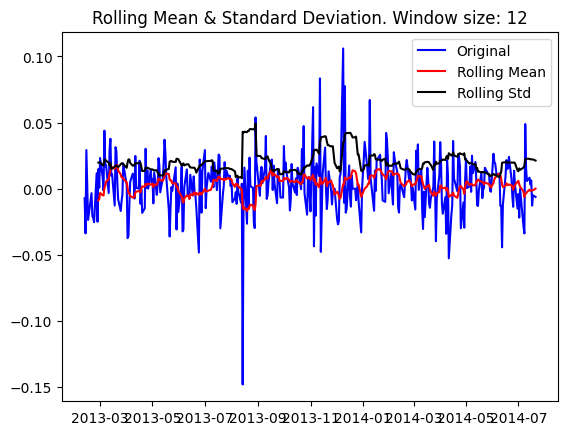

Results of Dickey-Fuller Test:
Test Statistic                -1.754962e+01
p-value                        4.148924e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.620000e+02
Critical Value (1%)           -3.448544e+00
Critical Value (5%)           -2.869557e+00
Critical Value (10%)          -2.571041e+00
dtype: float64


In [31]:
# Derivada manual

data_log_diff = data_log - data_log.shift()

data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff,12)

**3.   Ajusta un modelo ARIMA, y calcula el error de predicción.**

De forma análoga al ejemplo anterior, aplicamos las funciones ACF y PACF para obtener los valores de $p$ y $q$ del modelo ARMA. Una vez obtenidos los valores que sobrepasen nuestro intervalo de confianza, aplicamos la derivada (establecemos $d=1$ sobre los datos originales o establecemos $d=0$ y trabajamos sobre la serie derivada manualmente calculada en el apartado anterior). Así, obtendremos un modelo ARIMA de la serie y podemos calcular sus errores de predicción.

En vista de los resultados de ACF y PACF, los valores de $p$ y $q$ son $p=q=0$. Aplicando una derivada ($d=1$) a los datos originales, se obtiene finalmente que el modelo ARIMA aplicado presenta un error de predicción de $RSS=0.17$ y $RMSE=0.5667$.

Ambos valores son muy bajos, por lo que se puede concluir que las predicciones del modelo ARIMA son muy acertadas.

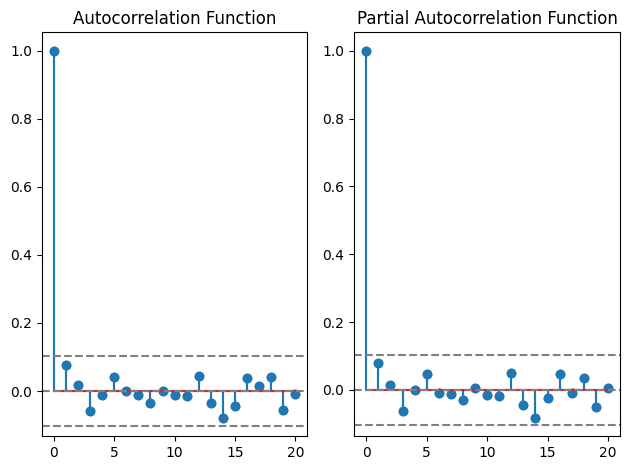

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20, fft=False)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.title('Partial Autocorrelation Function')

#Plot ACF:
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\imcir\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

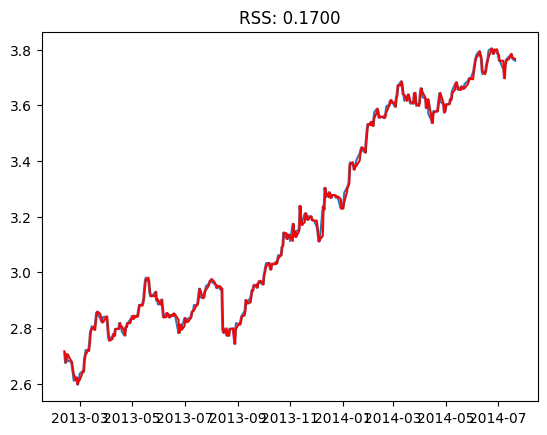

In [33]:
# RSS: Residual sum of squares

# ARIMA
p = 0
d = 1
q = 0

model = ARIMA(data_log, order=(p, d, q))
results_ARIMA = model.fit()
plt.plot(data_log[1:])
plt.plot(results_ARIMA.fittedvalues[1:], color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:]-data_log[1:])**2))
plt.show()

date
2013-02-08    0.000000
2013-02-11    2.716018
2013-02-12    2.708717
2013-02-13    2.674838
2013-02-14    2.704042
dtype: float64
363


Text(0.5, 1.0, 'RMSE: 0.5667')

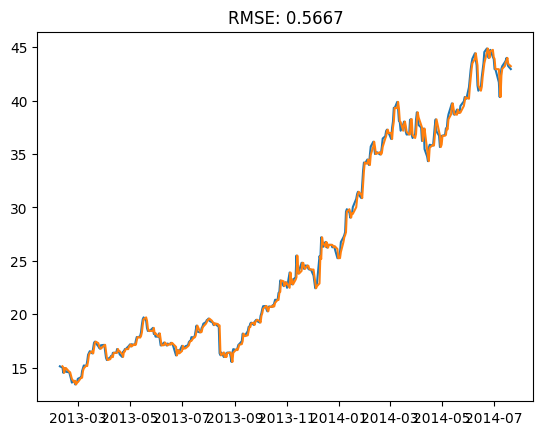

In [34]:
# Realizamos predicciones

predictions_ARIMA_log = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_log.head())

# Deshacemos el logaritmo
predictions_ARIMA = np.exp(predictions_ARIMA_log[1:])

plt.plot(data)
plt.plot(predictions_ARIMA)

print(len(predictions_ARIMA))

plt.title('RMSE: %.4f'% np.sqrt(np.sum((predictions_ARIMA-data)**2)/len(data)))